# Plotting Representative data

In [163]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')

In [164]:
fluevaxdata = pd.read_csv('data/2013-2018_consolidated_flu_data.csv')

In [165]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
           'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
           'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
           'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
           'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
           'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
           'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
           'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
           'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
           'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [166]:
fluevaxdata = fluevaxdata[(fluevaxdata.stats.isin(['avg', 'LL', 'UL']) & 
            (fluevaxdata.state_or_region.isin(states)) &
            (fluevaxdata.race_or_age=='≥6 months'))]

In [167]:
fluevaxdata = fluevaxdata[~fluevaxdata.value.isin(["NR †", "NR *", "NR"])]

In [168]:
fluevaxdata.value = fluevaxdata.value.apply(float)

In [169]:
states_of_interest = ['Minnesota', 'Tennessee']

In [170]:
fluevaxdata = fluevaxdata[fluevaxdata.state_or_region.isin(states_of_interest)]

In [171]:
pivot_data = pd.pivot_table(fluevaxdata, values='value', columns=['year', 'stats', 'state_or_region'], 
               index='month')
pivot_data = pivot_data.loc[['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan','Feb', 'Mar', 'Apr', 'May']]


/home/wmvoje/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/wmvoje/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


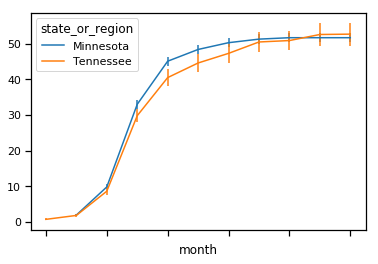

In [172]:
error = pivot_data['2013-2014']['avg'] - pivot_data['2013-2014']['LL']
pivot_data['2013-2014']['avg'].plot.line(yerr=error)

In [173]:

pivot_data = pd.pivot_table(fluevaxdata, values='value', columns=['stats', 'state_or_region', 'year'] ,
               index='month')
pivot_data = pivot_data.loc[['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan','Feb', 'Mar', 'Apr', 'May']]


/home/wmvoje/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/wmvoje/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/wmvoje/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/wmvoje/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


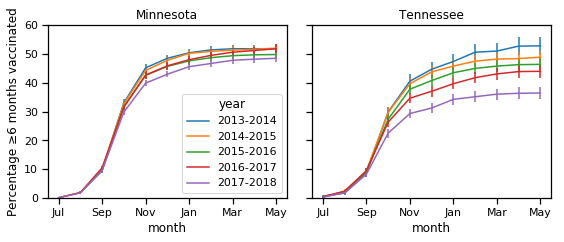

In [179]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(8, 3.5))
error = pivot_data['avg'] - pivot_data['LL']

state = 'Minnesota'

pivot_data['avg'][state].plot.line(yerr=error[state], title=state, ax=ax[0])
ax[0].set_xticklabels([ '', 'Jul',  'Sep', 'Nov', 'Jan', 'Mar', 'May'])

ax[0].set_ylim(0, 60)
ax[0].set_ylabel('Percentage ≥6 months vaccinated')

state = 'Tennessee'

pivot_data['avg'][state].plot.line(yerr=error[state], title=state, ax=ax[1])
ax[1].get_legend().remove();
 
ax[1].set_xticklabels([ '', 'Jul',  'Sep', 'Nov', 'Jan', 'Mar', 'May']);

fig.tight_layout()

fig.savefig('figures/cdc_ground_truth.jpg', dpi=150)




# Baseline Model

In [2]:
cdc_data = pd.read_csv('data/cdc_average_bystate_2013-2017.csv')

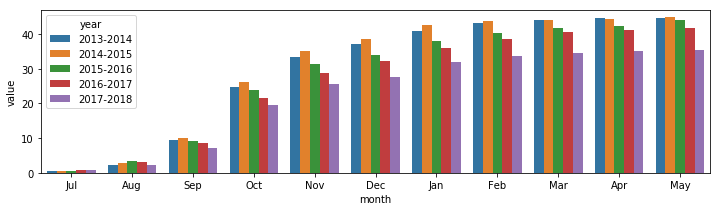

In [3]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.barplot(x='month', y='value', hue='year', 
            hue_order=['2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018'],
            data=cdc_data[cdc_data.state_or_region=='Louisiana'], ax=ax)

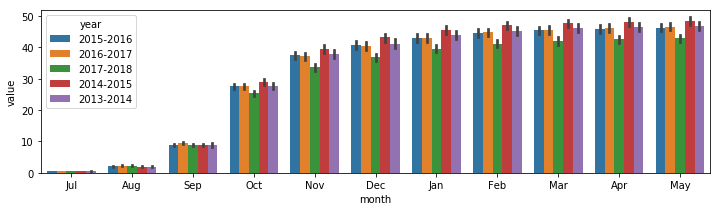

In [4]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.barplot(x='month', y='value', hue='year', 
            data=cdc_data, ax=ax)

# Baseline model

Here we create a model which predicts the amount of flu vaccinations based on the the behavior of previous years.

In [180]:
pivoted_data = pd.pivot_table(cdc_data, values='value', columns=['month', 'year'], index='state_or_region')

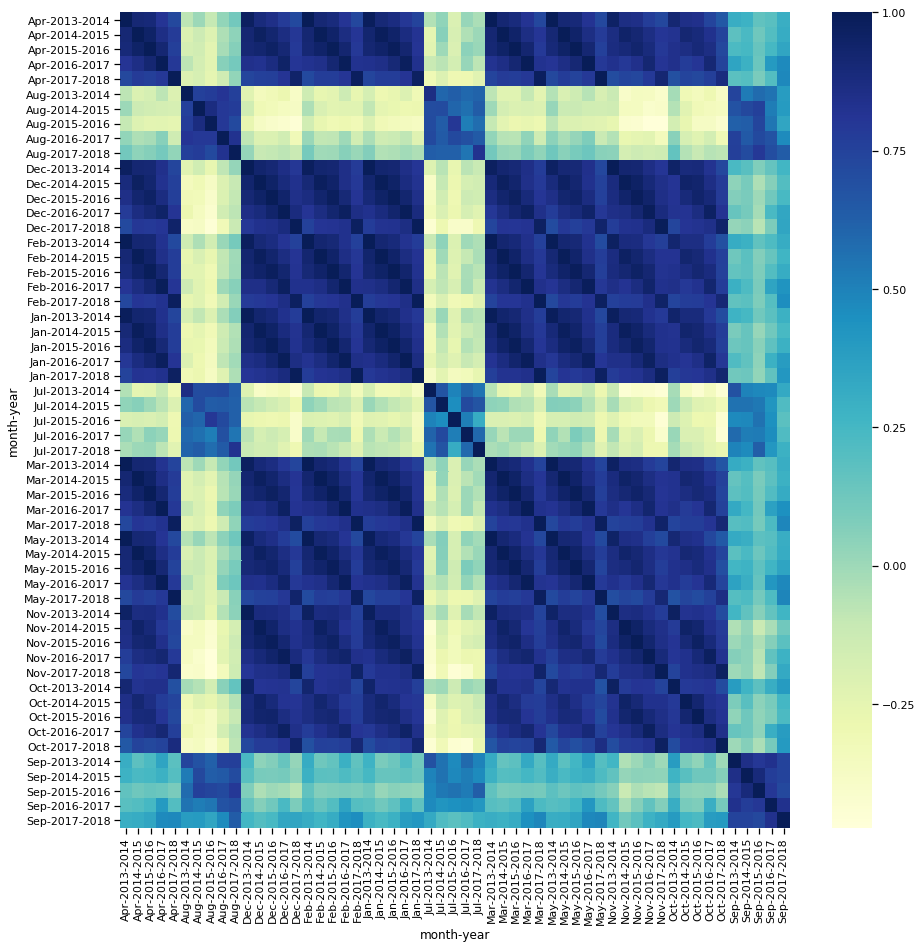

In [181]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pivoted_data.corr(), cmap="YlGnBu", cbar=True, ax=ax)

In [182]:
# Taking the average of the first three years

In [183]:
cdc_data.year.unique()

array(['2015-2016', '2016-2017', '2017-2018', '2014-2015', '2013-2014'],
      dtype=object)

In [184]:
three_year_avg_13_16 = pd.pivot_table(cdc_data[cdc_data.year.isin(['2013-2014', '2014-2015', '2015-2016'])],
                values='value', columns=['month'], index='state_or_region')

In [185]:
data_16_18 = pd.pivot_table(cdc_data[cdc_data.year.isin(['2016-2017', '2017-2018'])],
                values='value', columns=['year', 'month'], index='state_or_region')

In [186]:
def calculate_regression_squares_dataframes(dataframe1, dataframe2):
    diff = dataframe1 - dataframe2
    diff = diff**2
    return diff.sum(axis=1)

def calculate_total_varience(dataframe):
    diff = dataframe.subtract(dataframe.mean(axis=1), axis='rows')
    dif = diff**2
    return dif.sum(axis=1)

def calculate_coeff_varience(exp_df, model_df):
    return 1 - calculate_regression_squares_dataframes(exp_df, model_df)/calculate_total_varience(exp_df)

In [187]:
results_2016 = calculate_coeff_varience(data_16_18['2016-2017'], three_year_avg_13_16)

In [188]:
results_2017 = calculate_coeff_varience(data_16_18['2017-2018'], three_year_avg_13_16)

In [189]:
residuals = pd.concat([results_2016, results_2017], axis=1)

In [190]:
residuals.columns = ['2016-17', '2017-18']

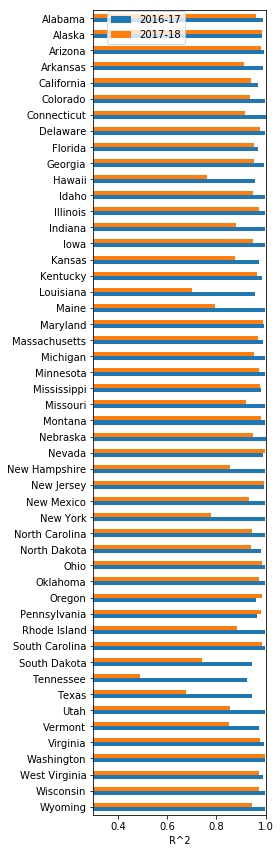

In [55]:
fig, ax = plt.subplots(figsize=(4,12))

residuals.sort_index(ascending=False).plot.barh(ax=ax).legend(bbox_to_anchor=(0.05, 0.952));
ax.set_xlabel('R^2');
ax.set_xlim(0.3, 1);
ax.set_ylabel('');

fig.tight_layout()

fig.savefig('figures/baseline_model_predictions.jpg', dpi=150)


In [197]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [198]:
mean_confidence_interval(residuals['2016-17'])

(0.9866027805295993, 0.004885313800211165)

In [199]:
mean_confidence_interval(residuals['2017-18'])

(0.9156565574054095, 0.028404400552447525)

In [195]:
residuals.mean()

2016-17    0.986603
2017-18    0.915657
dtype: float64